#### Author: Vincent Yeo

### Image Recognition with Fashion MNIST dataset

The Fashion MNIST serves as a replacement for the MNIST dataset as benchmark for machine learning algorithms. It contains the similar 28x28 grayscale images associated with 10 classes of objects. 

#### Task: 

Use Convolutional Neural Network (CNN) to solve image recognition problems


In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import np_utils

import matplotlib.pyplot as plt     
import matplotlib.cm as cm 
import numpy as np

Using TensorFlow backend.


The dataset labels are as follows:

|Label|Category|
|-------|------|
|0|T-shirt/top |
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# Size of the Training and Test set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
# convert 2d arrays into 1d
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [5]:
# 10 classes of fashion
classes = 10
Y_train = np_utils.to_categorical(y_train, classes)     
Y_test = np_utils.to_categorical(y_test, classes)

In [12]:
# Import early stopping from keras callbacks
from keras.callbacks import EarlyStopping
# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

epochs = 50
batch_size = 1000

model = Sequential()     
model.add(Dense(100, input_shape=(784, ), activation='sigmoid'))     

# Hidden layers
model.add(Dense(100, activation='relu'))

# Hidden layers
model.add(Dense(100, activation='sigmoid'))

# Output Layers
model.add(Dense(10, activation='softmax')) 

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs, verbose=1, callbacks = [early_stopping])

score = model.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score[1]) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 195us/step - loss: 1.4942 - acc: 0.5716 - val_loss: 0.8534 - val_acc: 0.7149
Epoch 2/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.7073 - acc: 0.7562 - val_loss: 0.6439 - val_acc: 0.7736
Epoch 3/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.5969 - acc: 0.7879 - val_loss: 0.6081 - val_acc: 0.7809
Epoch 4/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.5606 - acc: 0.8011 - val_loss: 0.5662 - val_acc: 0.7929
Epoch 5/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.5517 - acc: 0.8013 - val_loss: 0.5582 - val_acc: 0.8058
Epoch 6/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.5447 - acc: 0.8005 - val_loss: 0.5658 - val_acc: 0.8003
Epoch 7/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.5442 - acc: 0.8035 - val_loss: 0.5656 - val_a

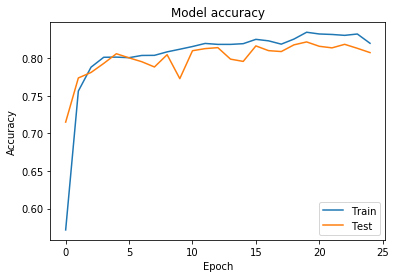

In [13]:
# Plot train vs test accuracy per epoch
plt.figure()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Final evaluation of the model
score = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: {:.3f}%".format(score[1]*100))

10000/10000 [==============================] - 2s 193us/step
Accuracy: 80.730%


In [ ]:
# model.save('fmnist.h5')

In [8]:
from keras.models import load_model
my_model = load_model('fmnist.h5')

In [6]:
from sklearn.metrics import classification_report

def evaluateClassifier(model, X_test, y_test):
    
    #round up the labels
    y_test_rounded = np.argmax(y_test, axis=1)
    
    y_pred = model.predict_classes(X_test)
    
    report = classification_report(y_test_rounded, y_pred)
    print(report)

    return report

In [9]:
report = evaluateClassifier(my_model, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1000
           1       0.97      0.95      0.96      1000
           2       0.76      0.58      0.66      1000
           3       0.82      0.83      0.83      1000
           4       0.58      0.83      0.68      1000
           5       0.93      0.90      0.91      1000
           6       0.55      0.50      0.53      1000
           7       0.89      0.90      0.90      1000
           8       0.94      0.92      0.93      1000
           9       0.90      0.93      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



#### Results & Analysis
Model achieves 80.73% on unseen test data

Based on each precision score, the model's prediction would be realised truely for

+ the `T-shirt/top`, 80% of the time.
+ the `Trouser`, 97% of the time.
+ the `Pullover`, 76% of the time.
+ the `Dress`, 82% of the time.
+ the `Coat`, 58% of the time.
+ the `Sandal`, 93% of the time.
+ the `Shirt`, 55% of the time.
+ the `Sneaker`, 89% of the time.
+ the `Bag`, 94% of the time.
+ the `Ankle Boot`, 90% of the time.

Based on each recall score, the model's prediction for

+ the `T-shirt/top` has about 74% being correct.
+ the `Trouser` has about 95% being correct.
+ the `Pullover` has about 58% being correct.
+ the `Dress` has about 83% being correct.
+ the `Coat` has about 83% being correct.
+ the `Sandal` has about 90% being correct.
+ the `Shirt` has about 50% being correct.
+ the `Sneaker` has about 90% being correct.
+ the `Bag` has about 92% being correct.
+ the `Ankle Boot` has about 93% being correct.

Based on each f1 score, the weighted average of the precision and recall for

+ the `T-shirt/top` is 77%
+ the `Trouser` is 96%
+ the `Pullover` is 66%
+ the `Dress` is 83%
+ the `Coat` is 68%
+ the `Sandal` is 91%
+ the `Shirt` is 53%
+ the `Sneaker` is 90%
+ the `Bag` is 93%
+ the `Ankle Boot` is 91%